In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
column_names = ["Time_of_Birth", "Sex", "Birth_Weight", "Minutes_After_Midnight"]
column_widths = [8, 8, 8, 8]
df = pd.read_fwf("source/babyboom.dat.txt", widths=column_widths, names=column_names)
df

,Time_of_Birth,Sex,Birth_Weight,Minutes_After_Midnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [6]:
var1 = pd.DataFrame({'Вариационный ряд': sorted(df['Birth_Weight'])})
var2 = pd.DataFrame({'Вариационный ряд': sorted(df['Minutes_After_Midnight'])})

Определим количество интервалов разбиения по формуле Стёрджеса: $$ 1 + \lfloor \log_2(n) \rfloor $$

In [7]:
num_bins = int(1 + np.floor(np.log2(df.shape[0])))
num_bins

6

1. Переменная "Birth weight in grams"
    1.1. Вариационный ряд

In [8]:
var1

,Вариационный ряд
0,1745
1,2121
2,2184
3,2208
4,2383
5,2576
6,2635
7,2846
8,2902
9,3034


1.2. Числовые характеристики

In [9]:
var1_info = var1['Вариационный ряд'].describe()
var1_info['Выборочная мода'] = stats.mode(var1['Вариационный ряд'], axis=None, keepdims=True)[0][0]
var1_info['Выборочная дисперсия'] = np.format_float_scientific(np.var(var1['Вариационный ряд']))
var1_info['Исправленная выборочная дисперсия'] = np.format_float_scientific(np.var(var1['Вариационный ряд'], ddof=1))
var1_info['Выборочный коэффициент асимметрии'] = stats.skew(var1['Вариационный ряд'])
var1_info['Выборочный коэффициент эксцесса'] = stats.kurtosis(var1['Вариационный ряд'])
var1_info

count                                                 44.0
mean                                           3275.954545
std                                             528.032458
min                                                 1745.0
25%                                                 3141.5
50%                                                 3404.0
75%                                                3571.75
max                                                 4162.0
Выборочная мода                                     3428.0
Выборочная дисперсия                 2.724814979338843e+05
Исправленная выборочная дисперсия    2.788182769556026e+05
Выборочный коэффициент асимметрии                 -1.11648
Выборочный коэффициент эксцесса                   0.812522
Name: Вариационный ряд, dtype: object

1.3. Гистограмма

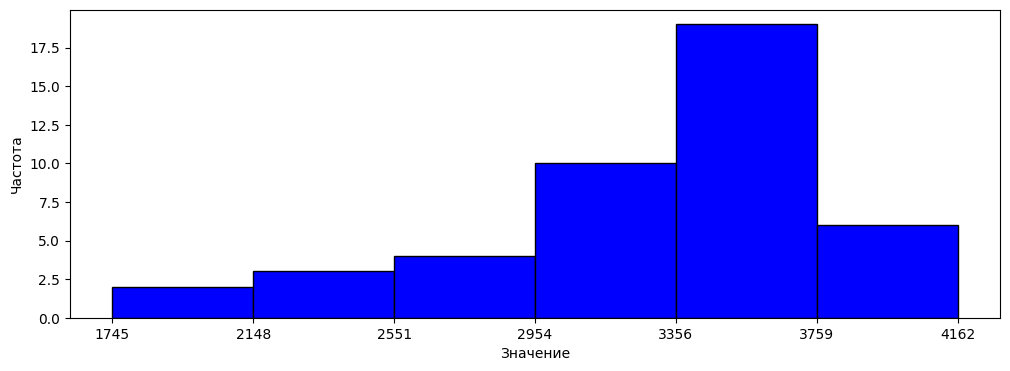

In [10]:
plt.figure(figsize=(12, 4))
plt.hist(var1['Вариационный ряд'], bins=num_bins, color='b', edgecolor='k')
plt.xlabel('Значение')
plt.ylabel('Частота')
bin_edges = np.linspace(var1_info['min'], var1_info['max'], num_bins + 1)
plt.xticks(bin_edges)
plt.show()

1.4. Ящик с усами

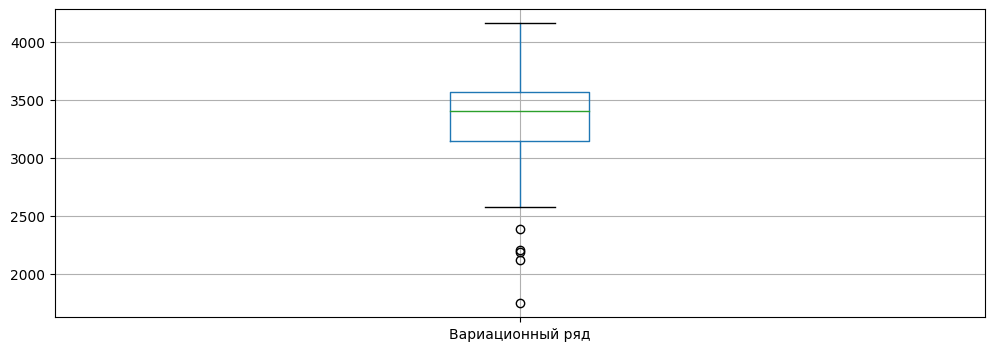

In [11]:
plt.figure(figsize=(12, 4))
var1.boxplot(column='Вариационный ряд')
plt.show()

1.5. Выдвижение гипотезы о распределении переменной

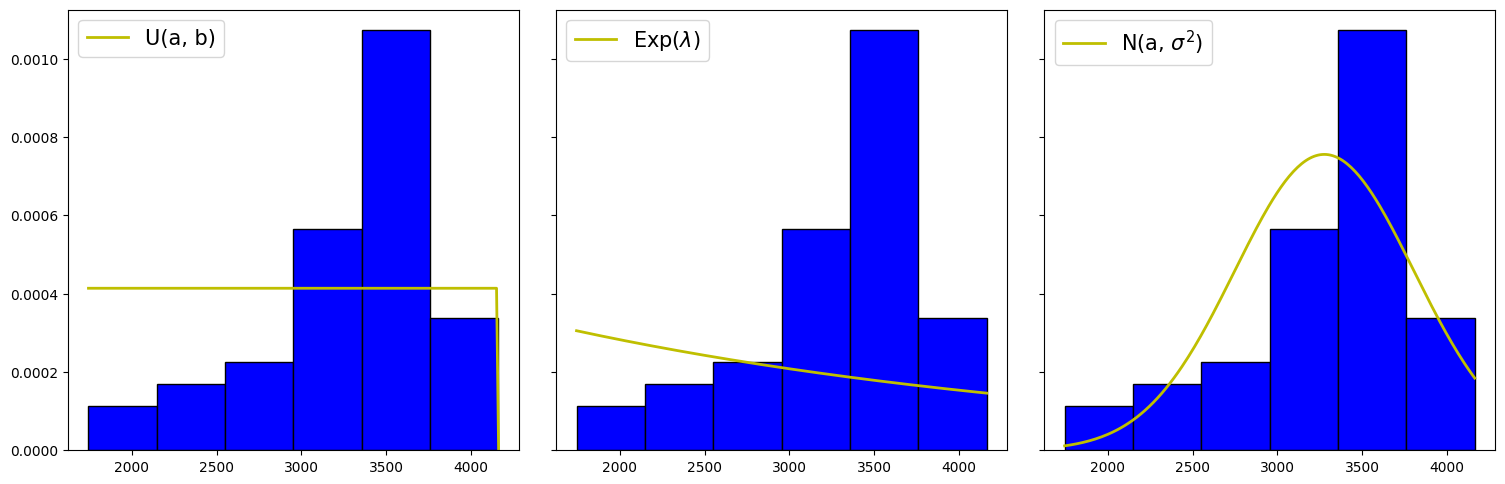

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
fig.tight_layout()

l1 = var1['Вариационный ряд']
x = np.linspace(min(l1), max(l1) + 1, num=200)
y0 = stats.uniform.pdf(x, loc=min(l1), scale=max(l1)-min(l1))
y1 = stats.expon.pdf(x, loc=min(l1), scale=var1_info['mean'])
y2 = stats.norm.pdf(x, loc=var1_info['mean'], scale=var1_info['std'])


ax[0].hist(var1['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[0].plot(x, y0, linewidth=2, color='y', label='U(a, b)')
ax[0].legend(fontsize=15)

ax[1].hist(var1['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[1].plot(x, y1, linewidth=2, color='y', label=r'Exp($\lambda$)')
ax[1].legend(fontsize=15)

ax[2].hist(var1['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[2].plot(x, y2, linewidth=2, color='y', label=r'N(a, $\sigma^2$)')
ax[2].legend(fontsize=15)

plt.show()

Можно сделать предположение, что переменная имеет нормальное распределение.

2. Переменная "Number of minutes after midnight of each birth"
    2.1. Вариационный ряд

In [14]:
var2

,Вариационный ряд
0,5
1,64
2,78
3,115
4,177
5,245
6,247
7,262
8,271
9,428


2.2. Числовые характеристики

In [15]:
var2_info = var2['Вариационный ряд'].describe()
var2_info['Выборочная мода'] = stats.mode(var2['Вариационный ряд'], axis=None, keepdims=True)[0][0]
var2_info['Выборочная дисперсия'] = np.format_float_scientific(np.var(var2['Вариационный ряд']))
var2_info['Исправленная выборочная дисперсия'] = np.format_float_scientific(np.var(var2['Вариационный ряд'], ddof=1))
var2_info['Выборочный коэффициент асимметрии'] = stats.skew(var2['Вариационный ряд'])
var2_info['Выборочный коэффициент эксцесса'] = stats.kurtosis(var2['Вариационный ряд'])
var2_info

count                                                 44.0
mean                                            788.727273
std                                             416.066931
min                                                    5.0
25%                                                 482.75
50%                                                  846.5
75%                                                 1158.5
max                                                 1435.0
Выборочная мода                                        5.0
Выборочная дисперсия                 1.691773347107438e+05
Исправленная выборочная дисперсия    1.731116913319239e+05
Выборочный коэффициент асимметрии                -0.318189
Выборочный коэффициент эксцесса                  -1.092957
Name: Вариационный ряд, dtype: object

2.3. Гистограмма

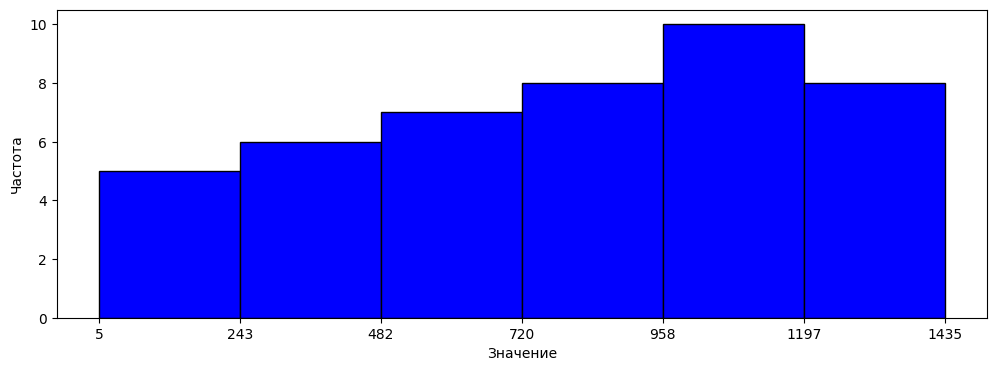

In [16]:
plt.figure(figsize=(12, 4))
plt.hist(var2['Вариационный ряд'], bins=num_bins, color='b', edgecolor='k')
plt.xlabel('Значение')
plt.ylabel('Частота')
bin_edges = np.linspace(var2_info['min'], var2_info['max'], num_bins + 1)
plt.xticks(bin_edges)
plt.show()

2.4. Ящик с усами

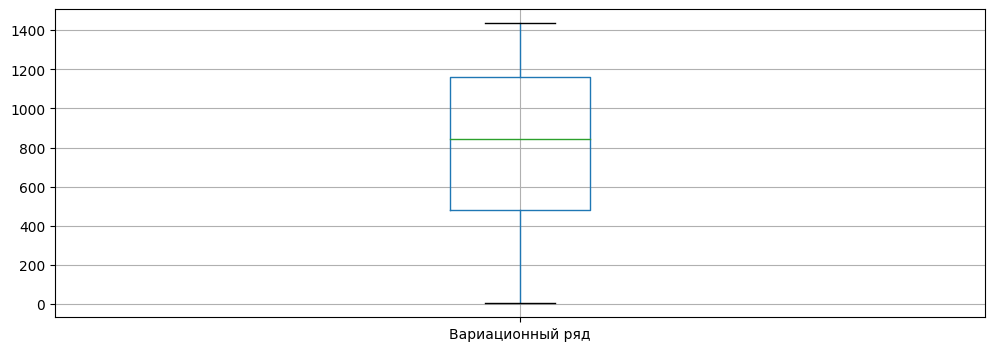

In [17]:
plt.figure(figsize=(12, 4))
var2.boxplot(column='Вариационный ряд')
plt.show()

2.5. Выдвижение гипотезы о распределении переменной

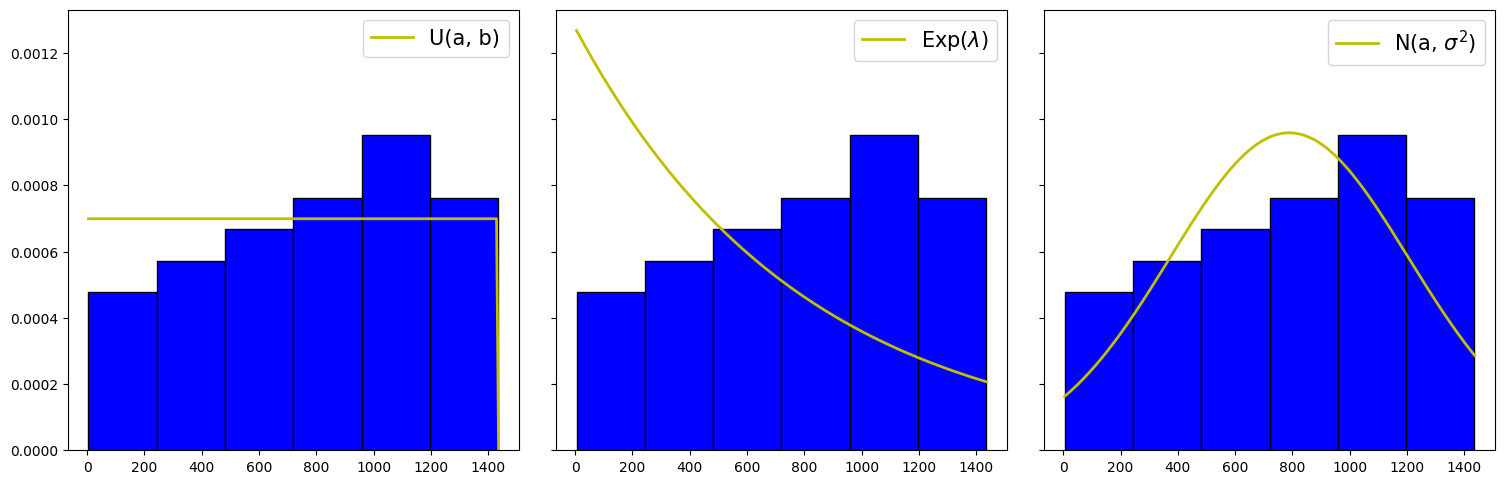

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
fig.tight_layout()

l2 = var2['Вариационный ряд']
x = np.linspace(min(l2), max(l2) + 1, num=200)
y0 = stats.uniform.pdf(x, loc=min(l2), scale=max(l2)-min(l2))
y1 = stats.expon.pdf(x, loc=min(l2), scale=var2_info['mean'])
y2 = stats.norm.pdf(x, loc=var2_info['mean'], scale=var2_info['std'])


ax[0].hist(var2['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[0].plot(x, y0, linewidth=2, color='y', label='U(a, b)')
ax[0].legend(fontsize=15)

ax[1].hist(var2['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[1].plot(x, y1, linewidth=2, color='y', label=r'Exp($\lambda$)')
ax[1].legend(fontsize=15)

ax[2].hist(var2['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[2].plot(x, y2, linewidth=2, color='y', label=r'N(a, $\sigma^2$)')
ax[2].legend(fontsize=15)

plt.show()

Можно сделать предположение, что переменная имеет нормальное распределение.

<Axes: >

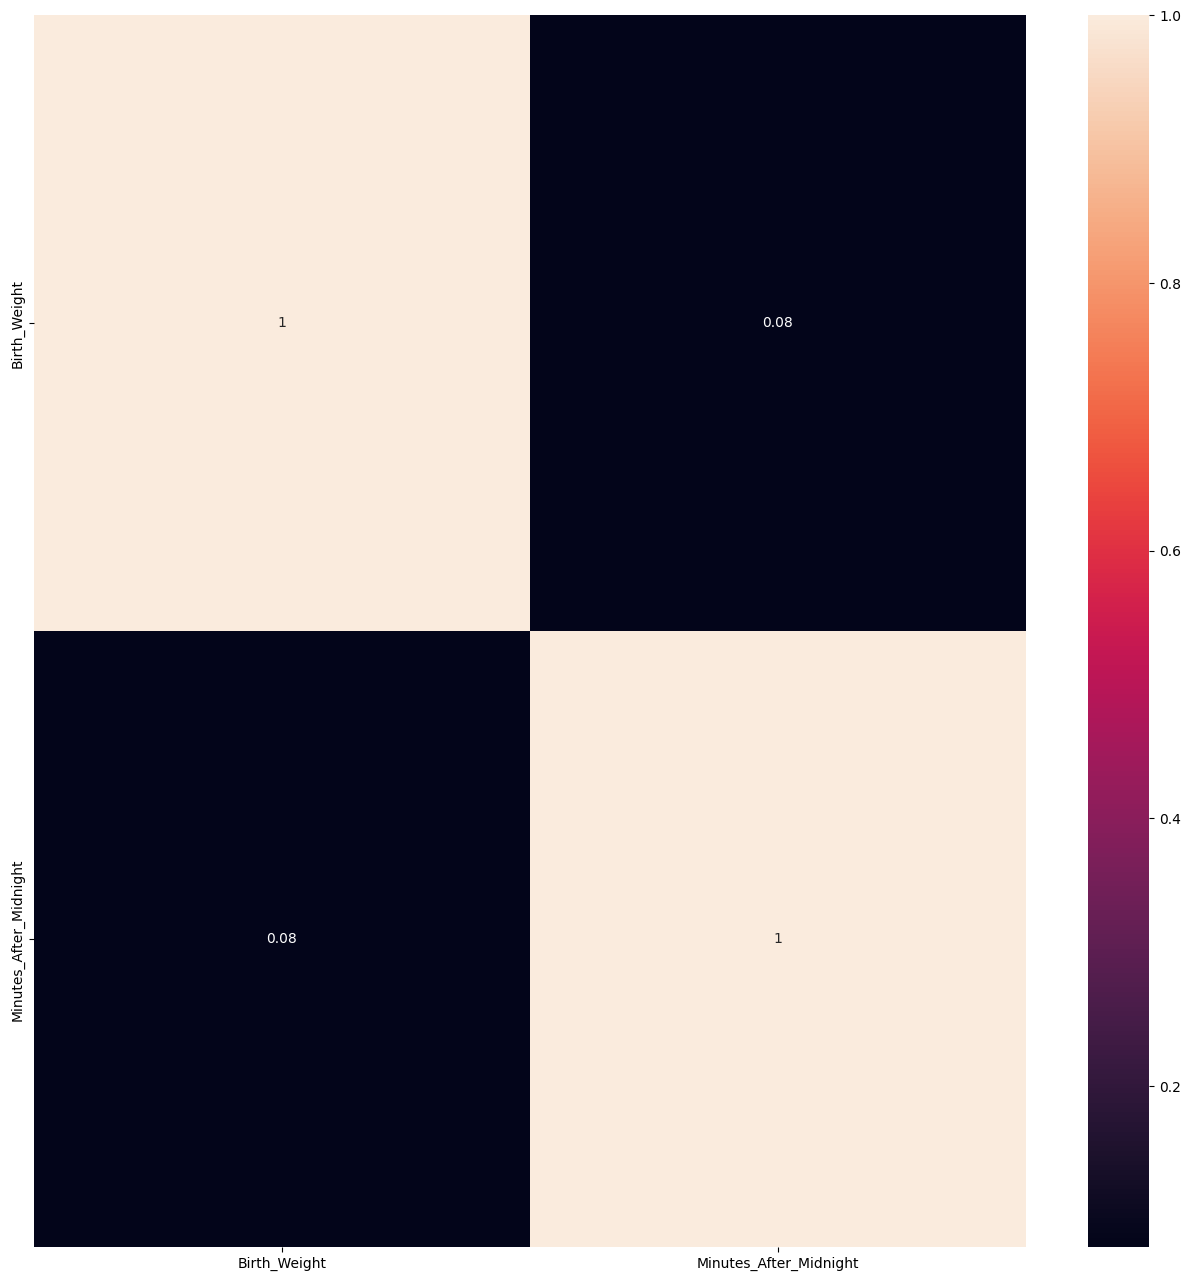

In [20]:
import seaborn as sns
plt.figure(figsize=(16,16))
mat = df[['Birth_Weight', 'Minutes_After_Midnight']].corr()
sns.heatmap(mat, annot=True)